In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
BASE_DIR = Path(__file__).resolve().parent.parent if '__file__' in globals() else Path.cwd().parent

x_train_path = BASE_DIR / 'data' / 'processed' /'notebook data'
y_train_path = BASE_DIR / 'data' / 'processed' /'notebook data'
x_test_path = BASE_DIR / 'data' / 'processed' /'notebook data'

X_train = pd.read_csv(x_train_path/'X_train_scaled.csv')
y_train = pd.read_csv(y_train_path/'y_train.csv')
X_test = pd.read_csv(x_test_path/'X_test_scaled.csv')

In [8]:
X_train = X_train.drop(0,axis=0)
y_train = y_train.drop(0,axis=0)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error ,r2_score ,root_mean_squared_error
from sklearn.model_selection import train_test_split

X_train_1 ,X_val_1 ,y_train_1 ,y_val_1 = train_test_split(X_train ,y_train ,test_size=0.2 ,random_state=42)

model = RandomForestRegressor(n_estimators=500, random_state=42)

y_train_1 = y_train_1.values.ravel()
model.fit(X_train_1,y_train_1)

y_pred_val = model.predict(X_val_1)
loss = root_mean_squared_error(y_val_1,y_pred_val) 
print(f'loss: {loss}')

r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')


loss: 34905.85271572153
r2: 0.7979831553548722


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_1,y_train_1)
y_pred_val = model.predict(X_val_1)
loss = root_mean_squared_error(y_val_1,y_pred_val)
print(f'loss: {loss}')
r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')

loss: 37435.852496043706
r2: 0.7676372356194716


In [11]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01,max_iter=5000, random_state=42)
model.fit(X_train_1,y_train_1)
y_pred_val = model.predict(X_val_1)
loss = root_mean_squared_error(y_val_1,y_pred_val)
print(f'loss: {loss}')
r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')


loss: 37435.8375880793
r2: 0.7676374206856529


In [12]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0 ,max_iter=5000, random_state=42)
model.fit(X_train_1,y_train_1)
y_pred_val = model.predict(X_val_1)
loss = root_mean_squared_error(y_val_1,y_pred_val)
print(f'loss: {loss}')
r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')

loss: 37406.26920597462
r2: 0.7680043349922278


In [13]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500,learning_rate=0.05 ,max_depth=4 , subsample=0.8,random_state=42)
xgb_model.fit(X_train_1,y_train_1)
y_pred_val = xgb_model.predict(X_val_1)
loss = root_mean_squared_error(y_val_1,y_pred_val)
print(f'loss: {loss}')
r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')

y_pred_xgb = y_pred_val

loss: 32391.208984375
r2: 0.8260416388511658


In [14]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05 ,
    max_depth=5, 
    subsample=0.8,
    min_child_samples=2,
    random_state=42   
)

model.fit(X_train_1,y_train_1)
y_pred_val = model.predict(X_val_1)
loss  = root_mean_squared_error(y_val_1,y_pred_val)
print(f'loss: {loss}')
r2 = r2_score(y_val_1,y_pred_val)
print(f'r2: {r2}')
y_pred_lgbmreg = y_pred_val

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2023
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 15
[LightGBM] [Info] Start training from score 180587.198800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

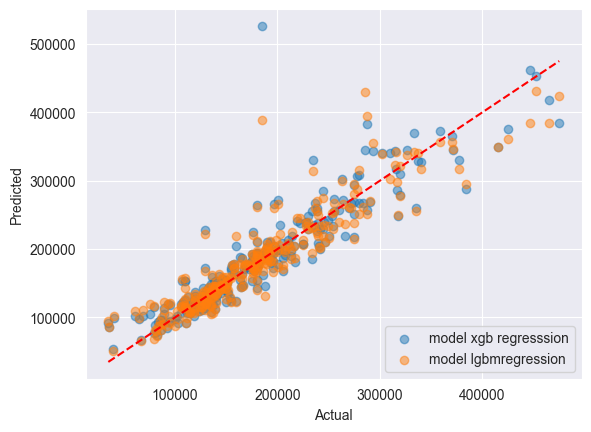

In [15]:
plt.scatter(y_val_1,y_pred_xgb,alpha=0.5,label='model xgb regresssion')
plt.scatter(y_val_1,y_pred_lgbmreg,alpha=0.5,label='model lgbmregression')
plt.plot([y_val_1.min(), y_val_1.max()], [y_val_1.min(), y_val_1.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()
